# Importing Required Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve
%matplotlib inline

# Loading Dataset

In [2]:
df=pd.read_csv('heart_failure_clinical_records_dataset (1).csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Exploratory Data Analysis

In [5]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Correlation Matrix

<AxesSubplot:>

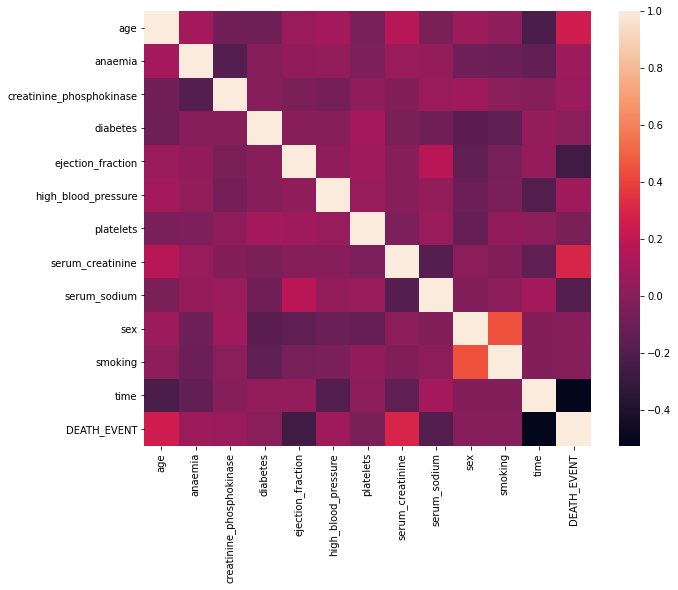

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

In [7]:
df.corr()[abs(df.corr()['DEATH_EVENT']) > 0.1]['DEATH_EVENT'] 

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

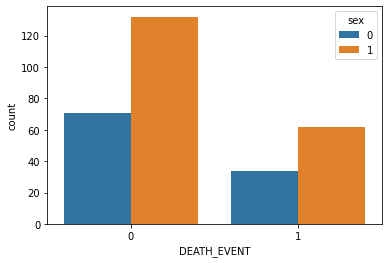

In [8]:
sns.countplot(x='DEATH_EVENT',hue='sex',data=df)

In [9]:
print(df['anaemia'].value_counts())

print(df['diabetes'].value_counts())

print(df['high_blood_pressure'].value_counts())

print(df['smoking'].value_counts())

0    170
1    129
Name: anaemia, dtype: int64
0    174
1    125
Name: diabetes, dtype: int64
0    194
1    105
Name: high_blood_pressure, dtype: int64
0    203
1     96
Name: smoking, dtype: int64


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

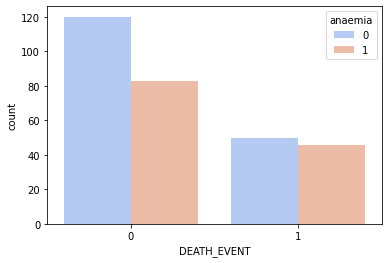

In [10]:

sns.countplot(x='DEATH_EVENT',hue='anaemia',data=df,palette='coolwarm')


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

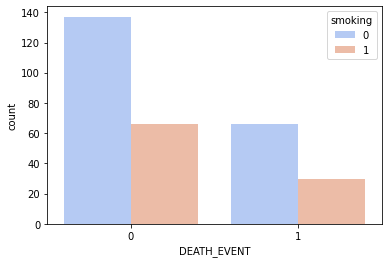

In [11]:
sns.countplot(x='DEATH_EVENT',hue='smoking',data=df,palette='coolwarm')


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

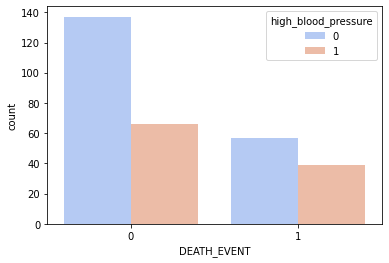

In [12]:
sns.countplot(x='DEATH_EVENT',hue='high_blood_pressure',data=df,palette='coolwarm')


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

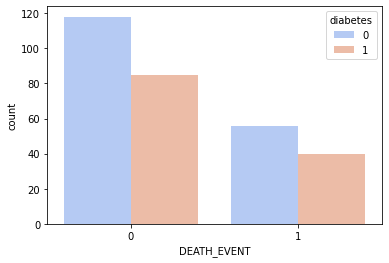

In [13]:
sns.countplot(x='DEATH_EVENT',hue='diabetes',data=df,palette='coolwarm')


In [14]:
df[df['platelets']>600000]['DEATH_EVENT']

105    1
109    0
296    0
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

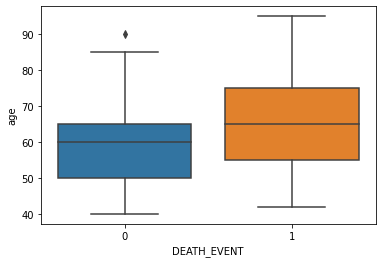

In [15]:
sns.boxplot(x='DEATH_EVENT',y='age',data=df)


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='creatinine_phosphokinase'>

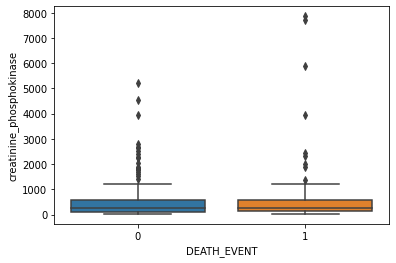

In [16]:
sns.boxplot(x='DEATH_EVENT',y='creatinine_phosphokinase',data=df)


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

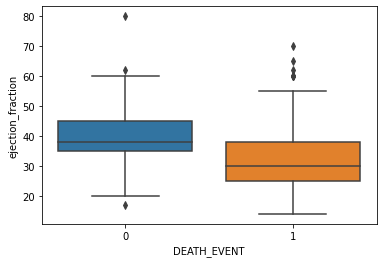

In [17]:
sns.boxplot(x='DEATH_EVENT',y='ejection_fraction',data=df)


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>

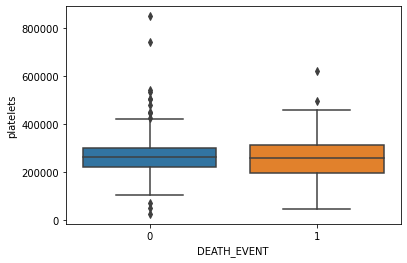

In [18]:
sns.boxplot(x='DEATH_EVENT',y='platelets',data=df)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

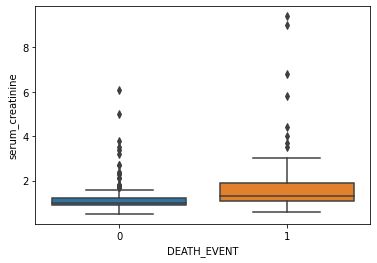

In [19]:
sns.boxplot(x='DEATH_EVENT',y='serum_creatinine',data=df)


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_sodium'>

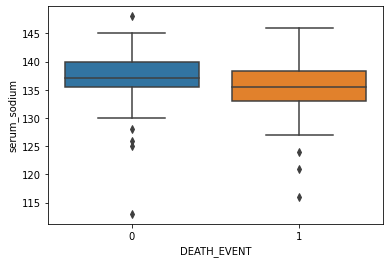

In [20]:
sns.boxplot(x='DEATH_EVENT',y='serum_sodium',data=df)

<AxesSubplot:xlabel='age', ylabel='Count'>

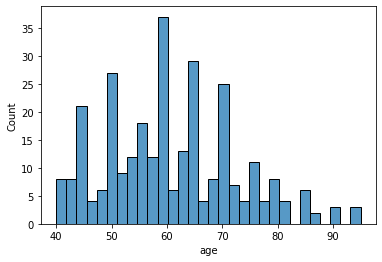

In [21]:
sns.histplot(df['age'],bins=30)

<AxesSubplot:xlabel='ejection_fraction', ylabel='Count'>

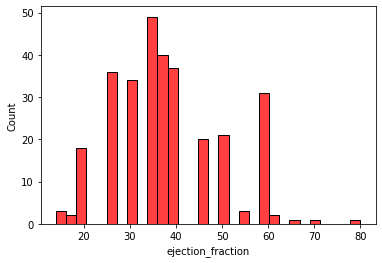

In [22]:
sns.histplot(df['ejection_fraction'],bins=30,color='r')


<AxesSubplot:xlabel='platelets', ylabel='Count'>

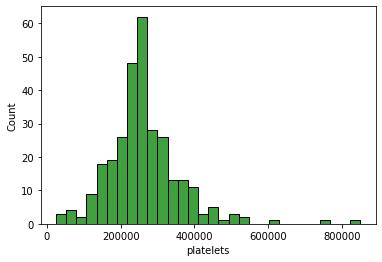

In [23]:
sns.histplot(df['platelets'],bins=30,color='g')

<AxesSubplot:xlabel='serum_creatinine', ylabel='Count'>

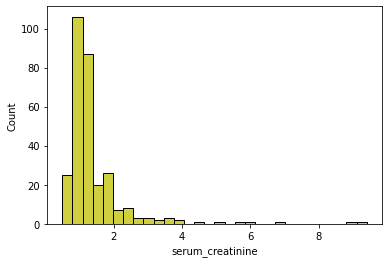

In [24]:
sns.histplot(df['serum_creatinine'],bins=30,color='y')

<AxesSubplot:xlabel='serum_sodium', ylabel='Count'>

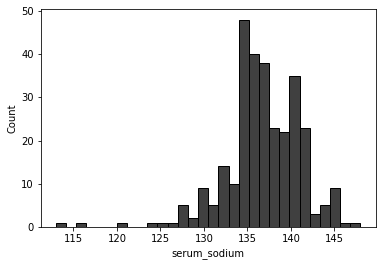

In [25]:
sns.histplot(df['serum_sodium'],bins=30,color='k')

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Count'>

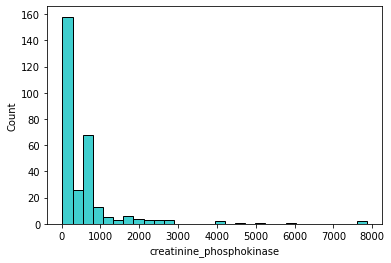

In [26]:
sns.histplot(df['creatinine_phosphokinase'],bins=30,color='c')

<AxesSubplot:xlabel='time', ylabel='Count'>

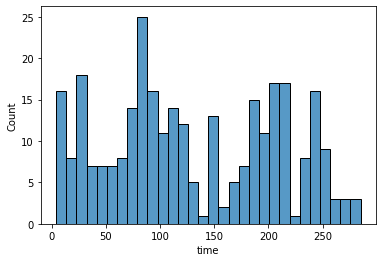

In [27]:
sns.histplot(x='time',data=df,bins=30)

# Splitting Data & Feature Scaling

In [28]:
x = df[['ejection_fraction','serum_creatinine','time','serum_sodium','age']]
y = df['DEATH_EVENT']

In [29]:
scalerer = StandardScaler()
scalerer.fit(x)
scaled_feature = scalerer.transform(x)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feature,df['DEATH_EVENT'],
                                                    test_size=0.30)

# K Nearest Neighbor Classifier

In [31]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [32]:
pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0], dtype=int64)

In [33]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[49 10]
 [13 18]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        59
           1       0.64      0.58      0.61        31

    accuracy                           0.74        90
   macro avg       0.72      0.71      0.71        90
weighted avg       0.74      0.74      0.74        90



In [34]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

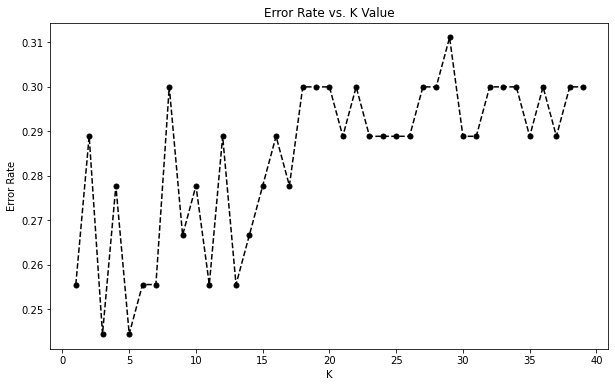

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='k', linestyle='dashed', marker='o',
         markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [36]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)

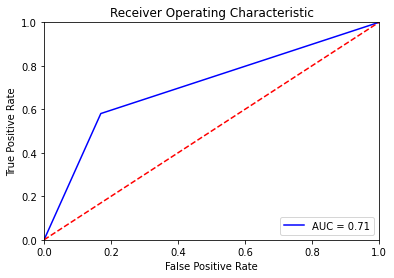

In [37]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Logistic Regression Model

In [38]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feature,df['DEATH_EVENT'],
                                                    test_size=0.30)

In [39]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [40]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[58  5]
 [ 6 21]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        63
           1       0.81      0.78      0.79        27

    accuracy                           0.88        90
   macro avg       0.86      0.85      0.85        90
weighted avg       0.88      0.88      0.88        90



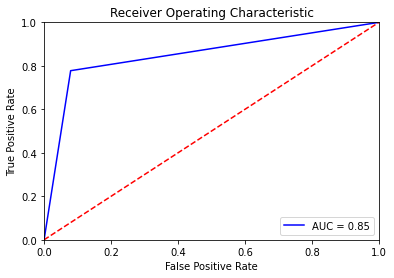

In [41]:
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feature,df['DEATH_EVENT'],
                                                    test_size=0.30)

In [44]:
RF.fit(X_train,y_train)
y_predR = RF.predict(X_test)
print(confusion_matrix(y_test,y_predR))
print(classification_report(y_test,y_predR))

[[49 15]
 [ 4 22]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        64
           1       0.59      0.85      0.70        26

    accuracy                           0.79        90
   macro avg       0.76      0.81      0.77        90
weighted avg       0.83      0.79      0.80        90



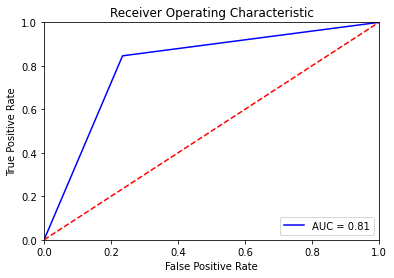

In [45]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predR)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()